In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=True)

C:\Users\expert\AppData\Local\Temp\ipykernel_4664\1382840123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


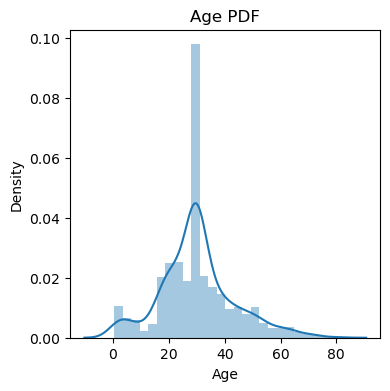

In [8]:
plt.figure(figsize=(4,4))
sns.distplot(X_train['Age'])
plt.title('Age PDF')
plt.show()

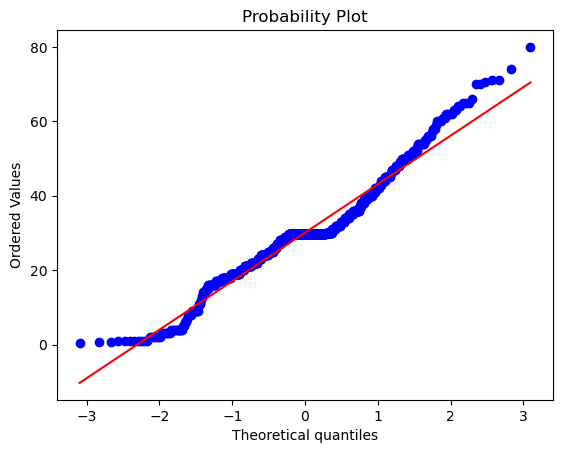

In [9]:
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()

C:\Users\expert\AppData\Local\Temp\ipykernel_4664\348273583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Age PDF')

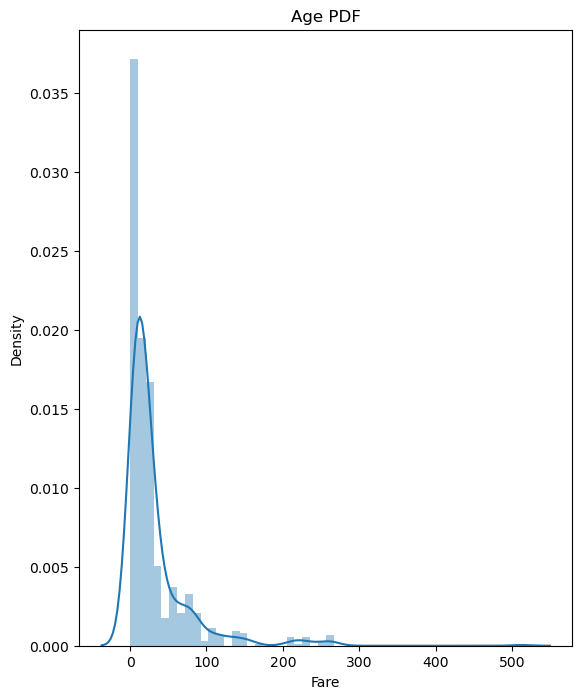

In [10]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

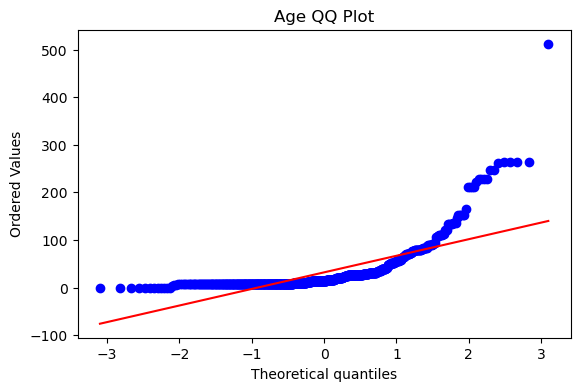

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6033519553072626
Accuracy DT 0.6089385474860335


In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6256983240223464
Accuracy DT 0.5865921787709497


In [16]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,
                                   X_transformed,
                                   y,scoring='accuracy',
                                  cv=10)))
print('DT',np.mean(cross_val_score(clf2,
                                   X_transformed,
                                   y,scoring='accuracy',
                                  cv=10)))

LR 0.678027465667915
DT 0.6621972534332085


Text(0.5, 1.0, 'Fare Before Log')

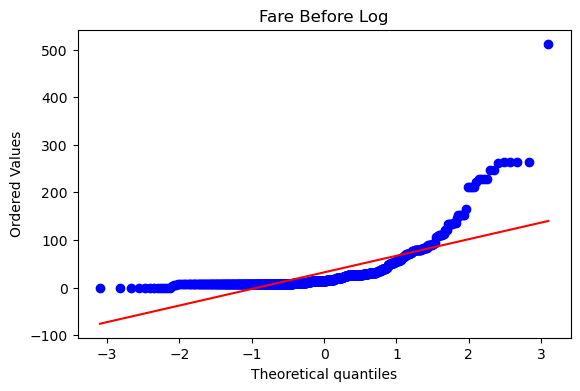

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

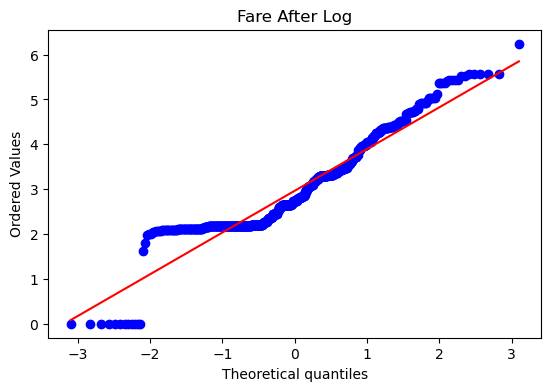

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

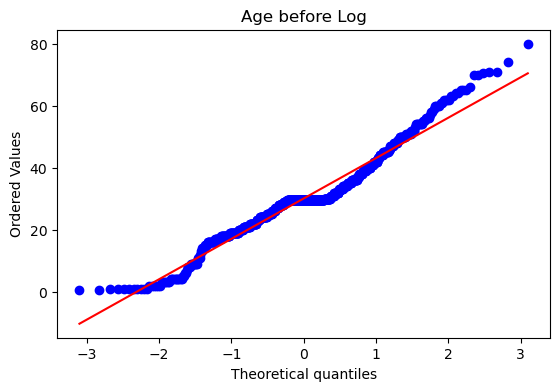

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age before Log')

plt.show()

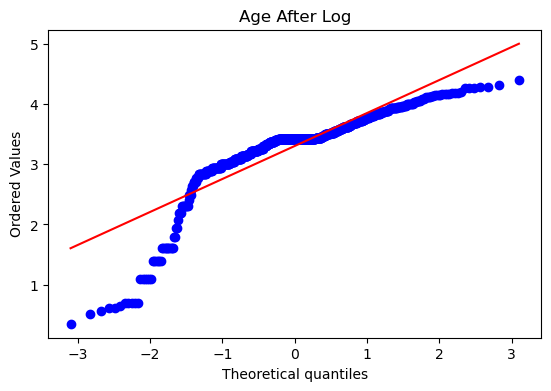

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After Log')

plt.show()

In [25]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p)
                           ,['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6368715083798883
Accuracy DT 0.6089385474860335


In [35]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610611735330837


In [45]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder = 'passthrough')
    
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    
    print("LR",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,8))
    
    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot = plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title('Fare After Transform')
    
    plt.show()

LR 0.6589013732833957


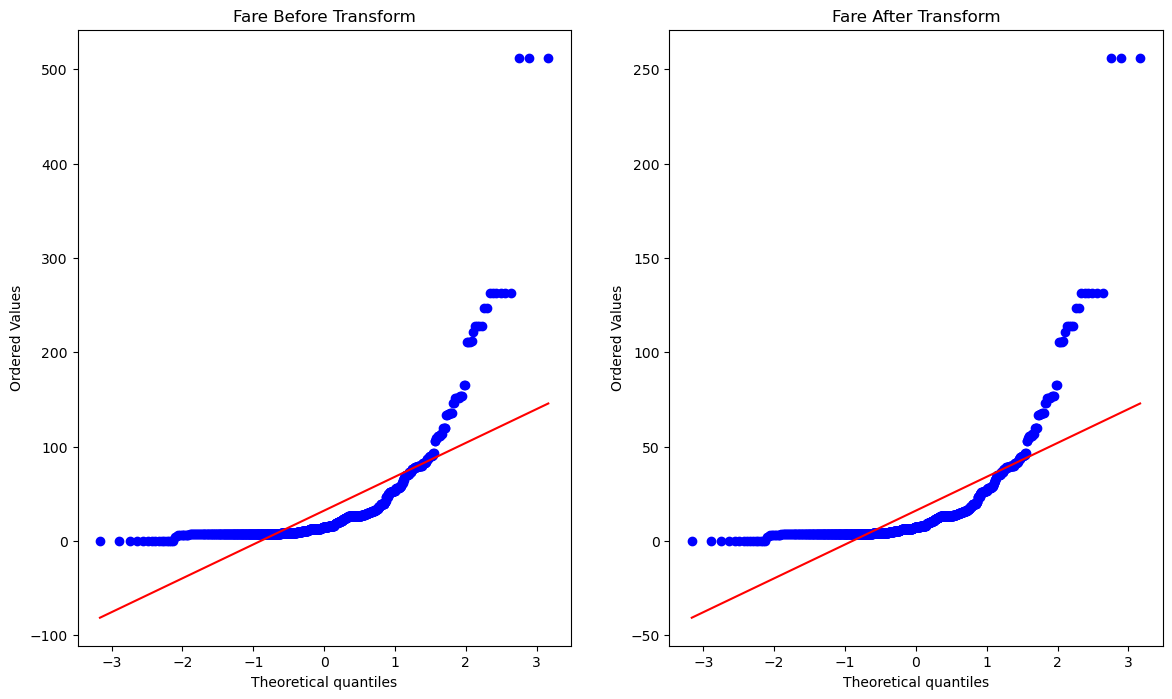

In [53]:
apply_transform(lambda x:x**1/2)